## Set-Up

In [70]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [8]:
# Define global variables
target_variable = 'AAPL'
lag_steps = 1

In [4]:
# Get Adj Close column
df = pd.read_csv('../../data/clean/djia_stock_data.csv', header=[0,1], index_col=0)
df_adjclose = df['Adj Close']
df_adjclose.head()

Ticker,AAPL,AMGN,AMZN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,...,MSFT,NKE,NVDA,PG,SHW,TRV,UNH,V,VZ,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,24.320435,120.226593,15.4260,80.133865,113.657204,70.110153,58.910961,20.189039,73.464256,86.310020,...,40.152481,42.353619,0.483143,67.861961,79.629883,84.121574,86.560966,61.672878,27.908205,23.441490
2015-01-05,23.635284,118.797897,15.1095,78.014641,112.870071,66.409309,57.846901,19.786867,70.527763,85.048737,...,39.783249,41.671707,0.474983,67.539314,79.393250,83.108360,85.135162,60.311527,27.676430,23.373260
2015-01-06,23.637510,114.970551,14.7645,76.352020,111.540627,65.981995,56.882286,19.779552,70.495117,84.597618,...,39.199341,41.426579,0.460582,67.231644,79.153549,82.366409,84.963387,59.922901,27.955755,23.553373
2015-01-07,23.968960,118.985886,14.9210,78.019562,113.272369,67.004478,56.613789,19.962358,70.436417,85.463020,...,39.697369,42.282307,0.459382,67.584343,80.503761,83.770576,85.830872,60.725742,27.775352,24.178303
2015-01-08,24.889904,118.557266,15.0230,79.125473,115.275284,67.691254,58.264568,20.115919,72.048218,86.346840,...,40.865200,43.258358,0.476663,68.357216,82.706612,85.509781,89.927879,61.540249,28.370665,24.688610


In [7]:
# Select target stock
df_adjclose_aapl = df_adjclose[[target_variable]]

# Transform index into Datetime
df_adjclose_aapl.index = pd.to_datetime(df_adjclose_aapl.index)
print(type(df_adjclose_aapl.index))
df_adjclose_aapl.head()

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


Ticker,AAPL
Date,
2015-01-02,24.320435
2015-01-05,23.635284
2015-01-06,23.637510
2015-01-07,23.968960
2015-01-08,24.889904


In [9]:
# Get lagged variables
for i in range(1, lag_steps + 1):
    df_adjclose_aapl[f'lag_{i}'] = df_adjclose_aapl[target_variable].shift(i)

print(df_adjclose_aapl.shape)
df_adjclose_aapl.dropna(inplace=True)
print(df_adjclose_aapl.shape)
df_adjclose_aapl.head()

(2515, 2)
(2514, 2)


/var/folders/4f/3w_37fps2jl_9bqnhfpl8d8h0000gn/T/ipykernel_83108/2848454398.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_adjclose_aapl[f'lag_{i}'] = df_adjclose_aapl[target_variable].shift(i)
/var/folders/4f/3w_37fps2jl_9bqnhfpl8d8h0000gn/T/ipykernel_83108/2848454398.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_adjclose_aapl.dropna(inplace=True)


Ticker,AAPL,lag_1
Date,,
2015-01-05,23.635284,24.320435
2015-01-06,23.637510,23.635284
2015-01-07,23.968960,23.637510
2015-01-08,24.889904,23.968960
2015-01-09,24.916597,24.889904


In [ ]:
# Export transformed dataset
df_adjclose_aapl.to_csv('../../data/clean/baseline_transformed_dataset_MLP.csv')

In [43]:
# Train-Test Split
split = int(df_adjclose_aapl.shape[0]*0.8)
train = df_adjclose_aapl[:split]
test = df_adjclose_aapl[split:]

print('Split Shape:', train.shape, test.shape)

Split Shape: (2011, 2) (503, 2)


In [44]:
# Scale to avoid distance calculation bias
scaler = MinMaxScaler(feature_range=(-1, 1))
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test) # Avoid data leakage

In [45]:
# Separate into features and target (first column)
X_train, y_train = train_scaled[:, 1:], train_scaled[:, 0]
X_test, y_test = test_scaled[:, 1:], test_scaled[:, 0]
print('Train Shape:', X_train.shape, y_train.shape)
print('Test Shape:', X_test.shape, y_test.shape)

Train Shape: (2011, 1) (2011,)
Test Shape: (503, 1) (503,)


## MLP

### Training

In [ ]:
model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42, max_iter=30, verbose=True)
model.fit(X_train, y_train)

Iteration 1, loss = 0.14518812
Iteration 2, loss = 0.01623274
Iteration 3, loss = 0.00336140
Iteration 4, loss = 0.00283115
Iteration 5, loss = 0.00103929
Iteration 6, loss = 0.00071486
Iteration 7, loss = 0.00056013
Iteration 8, loss = 0.00043610
Iteration 9, loss = 0.00036536
Iteration 10, loss = 0.00032652
Iteration 11, loss = 0.00030418
Iteration 12, loss = 0.00028621
Iteration 13, loss = 0.00027699
Iteration 14, loss = 0.00028063
Iteration 15, loss = 0.00026736
Iteration 16, loss = 0.00026432
Iteration 17, loss = 0.00026226
Iteration 18, loss = 0.00026312
Iteration 19, loss = 0.00028829
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=30, random_state=42,
             verbose=True)

### Predictions

In [ ]:
# Get predicted values
yhat = model.predict(X_test)

# Inverse Scaling
y_test_rescaled = scaler.inverse_transform(np.column_stack((y_test, np.zeros_like(y_test))))[:, 0]
y_pred_rescaled = scaler.inverse_transform(np.column_stack((yhat, np.zeros_like(yhat))))[:, 0]

In [72]:
# Get Test Errors
mae = np.sqrt(mean_absolute_error(y_test_rescaled, y_pred_rescaled))
print('MLP Test MAE: %.3f' % mae)

mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
print('MLP Test MSE: %.3f' % mse)

MLP Test MAE: 3.157
MLP Test MSE: 210.996


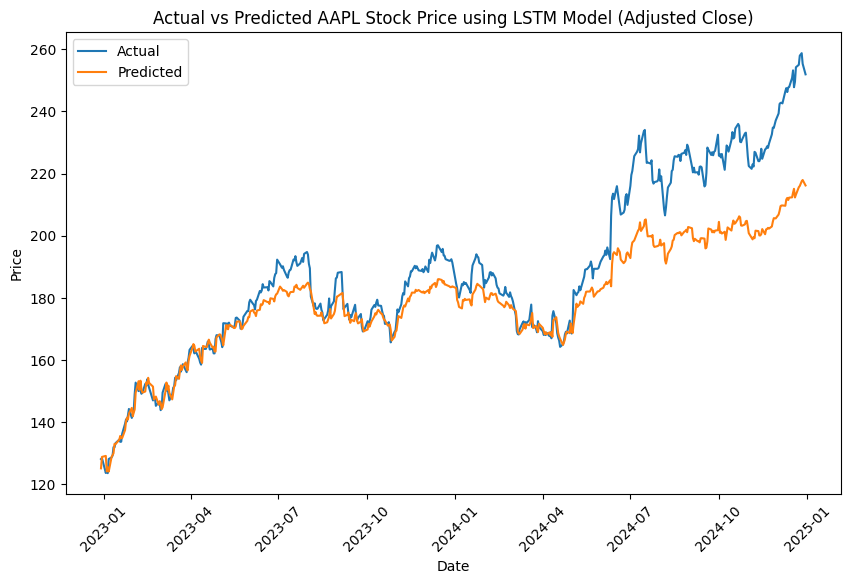

In [ ]:
# Validation plot
plt.figure(figsize=(10, 6))
plt.plot(test.index, y_test_rescaled, label='Actual')
plt.plot(test.index, y_pred_rescaled, label='Predicted')

# Format the x-axis to show quarterly ticks
plt.gca().xaxis.set_major_locator(mdates.MonthLocator((1,4,7,10)))  # Quarterly ticks
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format as Year-Quarter

# Labels and title
plt.title('Actual vs Predicted AAPL Stock Price using MLP Model (Adjusted Close)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Price')
plt.legend()
plt.show()